#### Question 5

Use the accept=reject method to sample from the following distribution p<sub>j</sub> by sampling from the (non-optimal) uniform auxiliary distribution (q<sub>j</sub> = .05 for j = 1, ...,20):
p<sub>1</sub> = p<sub>2</sub> = p<sub>3</sub> = p<sub>4</sub> = p<sub>5</sub> = .06, p<sub>6</sub> = p<sub>9</sub> = 0.15, p<sub>7</sub> = p<sub>10</sub> = 0.13, p<sub>8</sub> = 0.14. Estimate the efficiency of your sampler with the following ratio:  $$ Efficiency = \frac{accepted}{accepted + rejected} $$ Compare the estimate of the efficiency to the theoretical efficiency given your choice for the constant c.

In [54]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

Sampled expected value of X: 6.438764957896292
Theoretical expected value of X:  6.4799999999999995
Sampled variance of X: 7.238715921856701
Theoretical variance of X: 7.7223058169667596
Measured efficiency =  0.6769
Theoretical efficiency =  0.6666666666666666


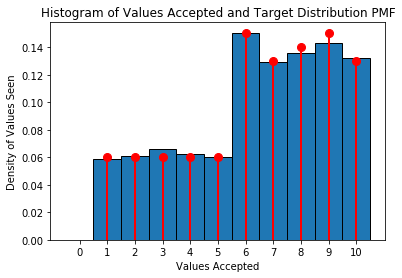

In [95]:
p = (1/100)*np.array([6, 6, 6, 6, 6, 15, 13, 14, 15 ,13])

X = []

k = 0
for i in range(0,10000): # 10000 trials
   
    k += 1  #total number of samples, accepted + rejected
    #print(k)
    j = int(1 + np.floor(10*np.random.rand()))   # Get Uniform j
    if (1.5*np.random.rand()) < p[j-1]/0.1: # Accept p(j) if U<p(j)/c, q(j)= 0.1
        X.append(j)
        


#print(k)
#print(len(C))
xk = np.arange(1,11)
pk = (.06, .06, .06, .06, .06, .15, .13, .14, .15 ,.13)
custm = stats.rv_discrete(name='custm', values=(xk, pk))
num_bins = np.arange(12)-.5
fig, ax = plt.subplots()

# the histogram of the data
n, bins, patches = ax.hist(X, num_bins, density=1, edgecolor = 'black')

# add a 'best fit' line
ax.plot(xk, custm.pmf(xk), 'ro', ms=8, mec='r')
ax.vlines(xk, 0, custm.pmf(xk), colors='r', linestyles='-', lw=2)
plt.xticks(range(11))
plt.xlabel("Values Accepted")
plt.ylabel("Density of Values Seen")
plt.title('Histogram of Values Accepted and Target Distribution PMF')
estimated_eff = len(X)/k
theoretical_eff = 1/1.5
sample_var = np.var(X)
theo_var = 0
for i in range(1,11):
    theo_var += i*i*p[i-1]
theo_var = theo_var - np.mean(X)* np.mean(X)

plt.savefig("Project3_Q5.png")
print('Sampled expected value of X:',str(np.mean(X)))
print("Theoretical expected value of X: ", str(np.dot(p,np.arange(1,11))))
print('Sampled variance of X:',str(sample_var))
print('Theoretical variance of X:',str(theo_var))
print('Measured efficiency = ', str(estimated_eff))
print('Theoretical efficiency = ', str(theoretical_eff ))


##### Q5 Analysis

- The histogram above shows the distribution of accepted values, along with the PMF in red. This method produces densities that are very similar to that of the theoretical distribution. 
- This can also be seen in the measured efficiency, which is just a little higher than the theoretical efficiency. 
- The sampled expected value and variance are also within hundreths of the theoretical values, another testament to the efficiency of this method at 10000 trails. 